**Feature selection** is one of the most important part for Machine Learning projects. Models can underperform due to;

- Training time increases with the number of features
- There is a risk of overfitting because of using a lot of features

This notebook includes 3 different feature selection methods;

1) Filter Methods

2) Wrapper Methods and

3) Embedded Methods.

Dataset can be found from [here](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset/version/1#).

In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv("Desktop/telecom_churn.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
# Dropping some irrelevant columns before analysis
df.drop(['account length', 'area code', 'phone number'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
state                     3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64
customer service calls    3333 non-null int64
churn                     3333 non-null bool
dtypes: bool(1), float64(8), int64(6), object(3

Separate X and y by features and target and encoding target variable

In [16]:
y = df.churn
X = df.drop('churn', axis = 1)

# Encoding
y = y.apply(lambda x:x*1)

Separating features into categorical and numerical

In [24]:
# Categorical Columns
cat = X.iloc[:,:3]
num = X.iloc[:,3:]
print('There are {} categorical variables and {} numerical variables'.format(3, len(X.columns)-3))

There are 3 categorical variables and 14 numerical variables


In [32]:
# Check if there is a negative value
num.lt(0).any()

number vmail messages     False
total day minutes         False
total day calls           False
total day charge          False
total eve minutes         False
total eve calls           False
total eve charge          False
total night minutes       False
total night calls         False
total night charge        False
total intl minutes        False
total intl calls          False
total intl charge         False
customer service calls    False
dtype: bool

## Filter Methods ##

Filter Methods considers the relationship between features and the target variable to compute the importance of features.

**Chi-Square (SelectKBest)**

Please note this is only for non-negative values.

In [66]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

num_X = num.values
y_ = y.values

# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(num_X, y_)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_, '\n')
features = fit.transform(num_X)
# summarize selected features
print(features[:3,:3])

[6.206e+02 2.314e+03 4.553e+00 3.934e+02 3.672e+02 1.126e+00 3.120e+01
 5.345e+01 4.807e-01 2.406e+00 1.181e+01 1.258e+01 3.191e+00 1.608e+02] 

[[ 25.   265.1   45.07]
 [ 26.   161.6   27.47]
 [  0.   243.4   41.38]]


This method checks for and only captures linear relationships between features and labels. A highly correlated feature is given higher score and less correlated features are given lower score. Correlation is highly deceptive as it doesn’t capture strong non-linear relationships.

**Mutual Information**

In [93]:
# Regression
from sklearn.feature_selection import mutual_info_regression
# Classification
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_regression(num_X, y_)

feature_importances = {}

for i,f in enumerate(num.columns):
    feature_importances[f] = mi[i]

sorted(feature_importances.items(), key=lambda kv: kv[1], reverse=True)

/home/ercin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


[('total day minutes', 0.0604802939022786),
 ('total day charge', 0.05516738766067153),
 ('customer service calls', 0.035521659110579584),
 ('total night charge', 0.008401179116785507),
 ('total eve calls', 0.004089765589117889),
 ('total night minutes', 0.001247215232286436),
 ('number vmail messages', 0.0),
 ('total day calls', 0.0),
 ('total eve minutes', 0.0),
 ('total eve charge', 0.0),
 ('total night calls', 0.0),
 ('total intl minutes', 0.0),
 ('total intl calls', 0.0),
 ('total intl charge', 0.0)]

Advantage of using mutual information over chi-square is, it does well with the non-linear relationship between feature and target variable.

**Variance Threshold**

In [84]:
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object with a variance with a threshold of 0.5
thresholder = VarianceThreshold(threshold = 0.5)

# Conduct variance thresholding
high_variance = thresholder.fit_transform(num)

# View first three rows with features with variances above threshold
high_variance[0:3, 0:3]

array([[ 25. , 265.1, 110. ],
       [ 26. , 161.6, 123. ],
       [  0. , 243.4, 114. ]])

This method removes features with variation below a certain cutoff. The idea is when a feature doesn’t vary much within itself, it generally has very little predictive power. Variance Threshold doesn’t consider the relationship of features with the target variable.

## Wrapper Methods ##

**Recursive Feature Elimination**

As the name suggests, this method eliminates worst performing features on a particular model one after the other until the best subset of features are known.

In [46]:
Image(url= "https://cdn-images-1.medium.com/max/1560/1*qXqx7_hDtsO9ez7_nxSXOw.png", width=450, height=450)

In [80]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression(solver = 'liblinear')
rfe = RFE(model, 3)
fit = rfe.fit(num, y)
print("Num Features: {}\n".format(fit.n_features_))
print("Selected Features: {}\n".format(fit.support_))
print("Feature Ranking: {}\n".format(fit.ranking_))

Num Features: 3

Selected Features: [False False False False False False False False False False  True  True
 False  True]

Feature Ranking: [ 5  6 12 10  7  9  2 11  8  3  1  1  4  1]



## Embedded Methods ##

**LASSO Linear Regression**

Lasso Regression is performed by adding an extra term to the cost function of Linear Regression. This apart from preventing overfitting also reduces the coefficients of less important features to zero.

In [89]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

lasso = Lasso()
lasso.fit(num, y)
coeff_used = np.sum(lasso.coef_ != 0)

print ("number of features used: ", coeff_used)

number of features used:  2


**Tree based models**

It calculates feature importance for they need to keep the best performing features as close to the root of the tree. Constructing a decision tree involves calculating the best predictive feature.

[0.04  0.144 0.049 0.138 0.068 0.046 0.078 0.052 0.047 0.054 0.051 0.046
 0.051 0.135]


/home/ercin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


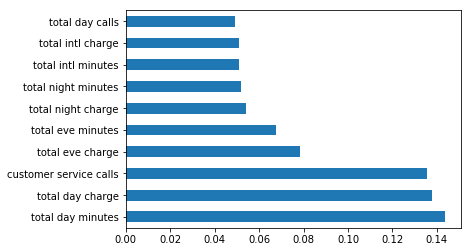

In [73]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(num, y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index = num.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()